In [33]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.stats as st

import seaborn as sns
import seaborn.objects as so

In [34]:
#HYPOTHESIS

#1) Misha
    #Do hybrid types have more happy effects compared to non-hybrid types?
        #Option 1: Create data frame from first 5 columns, then call columns needed to compare type with effect

    #Option 2: Group data by type and effect

    #Visual display of how many happy effects associated to each type - Donut Charts (3 total)
    
    #What is the correlation of type to effect-Use P-Values - Scatter Plot
        #Make sure to add statement - If P value is greater than x-value (look for this) there is a strong correlation

#2) Kim
    #Does sweet profile cannabis have a higher rating?
        #What Flavor had the Max Rating
        #What Flavor has the min Rating
        #What Flavor has the median Rating
    
#3) #Latti
    #Does the location of the breeder impact the rating? Does the location impact the type that is grown?


#4)  Tacha
    #Is there a significant difference in the effects experienced by consumers when they rate the same cannabis type differently? 
    #(Use data to get the ratings of the cannabis type and analyze the effects reported to see if they are consistent.) Do users feel different effects when they use the same type of cannabis(yes). How does this affect how they rate it? Ex: Hybrid- 13 users said it made them aroused. What is the average rating reported by those 13 people? Repeat for a few more effects in Hybrid, Sativa, then Indica.


In [35]:
Original_Data = pd.read_csv("new_cannabis_data.csv",encoding='latin-1')
Original_Data.head()

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",Medical Seeds Co,Spain
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN


In [36]:
Original_Data.Effects.str.split(",",expand=True)

,0,1,2,3,4
0,Uplifted,Happy,Relaxed,Energetic,Creative
1,Creative,Energetic,Tingly,Euphoric,Relaxed
2,Tingly,Creative,Hungry,Relaxed,Uplifted
3,Happy,Relaxed,Euphoric,Uplifted,Talkative
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2346,Happy,Uplifted,Relaxed,Euphoric,Energetic
2347,Relaxed,Happy,Euphoric,Uplifted,Sleepy
2348,Relaxed,Sleepy,Talkative,Euphoric,Happy
2349,Relaxed,Sleepy,Euphoric,Happy,Hungry


In [37]:
effects = Original_Data.Effects.str.split(",",expand=True)
effects.columns=["effect_1", "effect_2", "effect_3", "effect_4", "effect_5"]
effects.head()

,effect_1,effect_2,effect_3,effect_4,effect_5
0,Uplifted,Happy,Relaxed,Energetic,Creative
1,Creative,Energetic,Tingly,Euphoric,Relaxed
2,Tingly,Creative,Hungry,Relaxed,Uplifted
3,Happy,Relaxed,Euphoric,Uplifted,Talkative
4,NaN,NaN,NaN,NaN,NaN


In [38]:
flavors = Original_Data.Flavor.str.split(",",expand=True)
flavors.columns=["flavor_1", "flavor_2", "flavor_3", "flavor_4"]
flavors.head()

,flavor_1,flavor_2,flavor_3,flavor_4
0,Spicy/Herbal,Sage,Woody,None
1,Earthy,Sweet,Citrus,None
2,Apricot,Citrus,Grapefruit,None
3,Citrus,Earthy,Orange,None
4,NaN,NaN,NaN,NaN


In [39]:
flavors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   flavor_1  2195 non-null   object
 1   flavor_2  2161 non-null   object
 2   flavor_3  2117 non-null   object
 3   flavor_4  43 non-null     object
dtypes: object(4)
memory usage: 73.6+ KB


In [40]:
pd.concat([Original_Data, effects, flavors], axis=1)

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION,effect_1,effect_2,effect_3,effect_4,effect_5,flavor_1,flavor_2,flavor_3,flavor_4
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",Medical Seeds Co,Spain,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",A Greener Today's Dankczar,NaN,Happy,Uplifted,Relaxed,Euphoric,Energetic,Earthy,Woody,Pine,None
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",3rd Gen Family and Terp Hogz,NaN,Relaxed,Happy,Euphoric,Uplifted,Sleepy,Sweet,Berry,Grape,None
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",Ripper Seeds,NaN,Relaxed,Sleepy,Talkative,Euphoric,Happy,Earthy,Sweet,Spicy/Herbal,None
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",NaN,NaN,Relaxed,Sleepy,Euphoric,Happy,Hungry,Sweet,Earthy,Pungent,None


In [41]:
#Clean original data and combined data frame of the flavors and effects into the original Data Frame
OD2=pd.concat([Original_Data, effects, flavors], axis=1)
OD2.head()

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION,effect_1,effect_2,effect_3,effect_4,effect_5,flavor_1,flavor_2,flavor_3,flavor_4
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",Medical Seeds Co,Spain,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
OD2["num_effects"]=OD2.Effects.str.count(",")+1
OD2["num_flavors"]=OD2.Flavor.str.count(",")+1
OD2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2264 non-null   object 
 4   Flavor       2195 non-null   object 
 5   Breeders     1165 non-null   object 
 6   LOCATION     614 non-null    object 
 7   effect_1     2264 non-null   object 
 8   effect_2     2254 non-null   object 
 9   effect_3     2239 non-null   object 
 10  effect_4     2212 non-null   object 
 11  effect_5     2180 non-null   object 
 12  flavor_1     2195 non-null   object 
 13  flavor_2     2161 non-null   object 
 14  flavor_3     2117 non-null   object 
 15  flavor_4     43 non-null     object 
 16  num_effects  2264 non-null   float64
 17  num_flavors  2195 non-null   float64
dtypes: float64(3), object(15)
memory usage: 330.7+ K

In [43]:
OD2["effect_1"].value_counts()

effect_1
Relaxed      825
Happy        476
Euphoric     249
Uplifted     244
Sleepy        89
Creative      80
Energetic     74
Talkative     55
Focused       53
Aroused       38
Hungry        36
Tingly        32
Giggly        12
Dry            1
Name: count, dtype: int64

In [44]:
#Remove null values - Flavor4
OD2=OD2.drop(columns=["flavor_4"])
OD3=OD2.dropna(how="any")
OD3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 2341
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       501 non-null    object 
 1   Type         501 non-null    object 
 2   Rating       501 non-null    float64
 3   Effects      501 non-null    object 
 4   Flavor       501 non-null    object 
 5   Breeders     501 non-null    object 
 6   LOCATION     501 non-null    object 
 7   effect_1     501 non-null    object 
 8   effect_2     501 non-null    object 
 9   effect_3     501 non-null    object 
 10  effect_4     501 non-null    object 
 11  effect_5     501 non-null    object 
 12  flavor_1     501 non-null    object 
 13  flavor_2     501 non-null    object 
 14  flavor_3     501 non-null    object 
 15  num_effects  501 non-null    float64
 16  num_flavors  501 non-null    float64
dtypes: float64(3), object(14)
memory usage: 70.5+ KB


In [45]:
#We droped 12% of null values so 88% of our data is valid
#(2351-2053)/2351

In [46]:
#fIND TOTAL VALUES FOR EACH TYPE
OD3.Type.value_counts()

Type
hybrid    236
indica    157
sativa    108
Name: count, dtype: int64

In [47]:
#Find average rating for each
OD3.groupby("Type").Rating.mean()

Type
hybrid    4.398305
indica    4.455414
sativa    4.435185
Name: Rating, dtype: float64

In [48]:
#COUNT FOR EACH EFFECT FOR EFFECT1 BY TYPE
OD3.groupby(["Type", "effect_1"]).size()

Type    effect_1 
hybrid  Aroused        4
        Creative       6
        Energetic      4
        Euphoric      34
        Focused        7
        Happy         63
        Hungry         2
        Relaxed       74
        Sleepy         2
        Talkative      7
        Tingly         4
        Uplifted      29
indica  Aroused        2
        Creative       2
        Euphoric      15
        Focused        1
        Giggly         1
        Happy          8
        Hungry         1
        Relaxed      112
        Sleepy        10
        Talkative      1
        Uplifted       4
sativa  Aroused        3
        Creative       5
        Energetic      6
        Euphoric      21
        Focused        4
        Giggly         1
        Happy         31
        Hungry         1
        Relaxed        9
        Sleepy         1
        Talkative      2
        Uplifted      24
dtype: int64

In [49]:
#Create New Data Frame with Type and Effects
t_e1=OD3.groupby(["Type", "effect_1"]).size()

h11_df=pd.DataFrame(t_e1)
h11_df.head

<bound method NDFrame.head of                     0
Type   effect_1      
hybrid Aroused      4
       Creative     6
       Energetic    4
       Euphoric    34
       Focused      7
       Happy       63
       Hungry       2
       Relaxed     74
       Sleepy       2
       Talkative    7
       Tingly       4
       Uplifted    29
indica Aroused      2
       Creative     2
       Euphoric    15
       Focused      1
       Giggly       1
       Happy        8
       Hungry       1
       Relaxed    112
       Sleepy      10
       Talkative    1
       Uplifted     4
sativa Aroused      3
       Creative     5
       Energetic    6
       Euphoric    21
       Focused      4
       Giggly       1
       Happy       31
       Hungry       1
       Relaxed      9
       Sleepy       1
       Talkative    2
       Uplifted    24>

In [50]:
#Create Donut Charts for each type of cannabies to display how many "Happy" Effects they each have (Use Effect 1)

In [51]:
#HYBRID DATA FRAME
hybrid_e1=h11_df.loc["hybrid"]
hybrid_e1

,0
effect_1,
Aroused,4
Creative,6
Energetic,4
Euphoric,34
Focused,7
Happy,63
Hungry,2
Relaxed,74
Sleepy,2


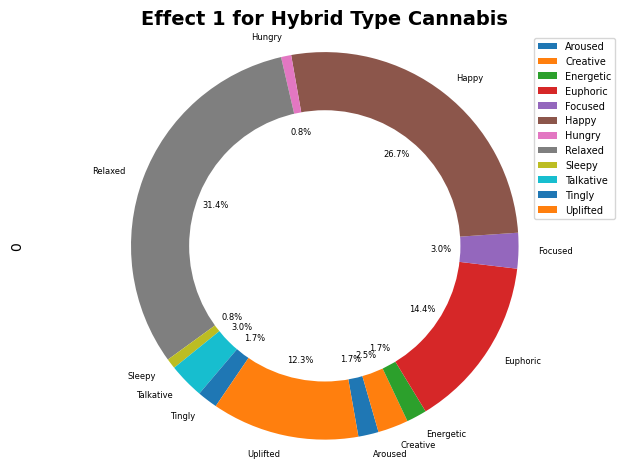

In [52]:
#HYBRID
#Create Donut Charts for each type of cannabies to display how many "Happy" Effects they each have (Use Effect 1)
hybrid_e1.plot(kind="pie",autopct="%1.1f%%",subplots=True,startangle=1000,fontsize=6)

plt.title("Effect 1 for Hybrid Type Cannabis",fontweight="bold",fontsize=14)
plt.axis("equal")
plt.tight_layout()
#plt.figure(figsize=(5,50))
plt.legend(loc='upper right',fontsize=7)

# draw circle
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# step 4, is to show or save it
plt.show()

In [53]:
#INDICA DATA FRAME
indica_e1=h11_df.loc["indica"]
indica_e1

,0
effect_1,
Aroused,2
Creative,2
Euphoric,15
Focused,1
Giggly,1
Happy,8
Hungry,1
Relaxed,112
Sleepy,10


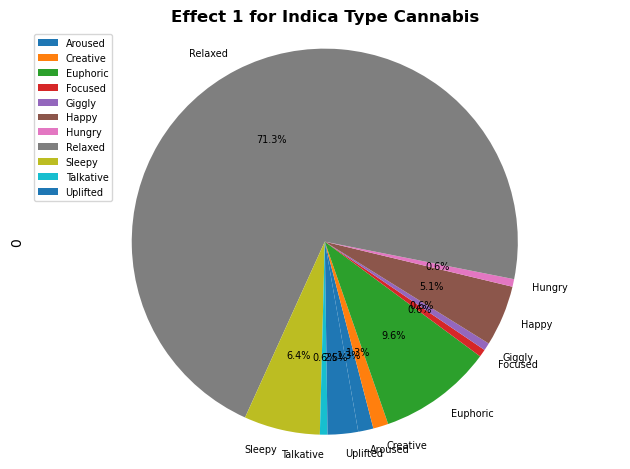

In [58]:
#INDICA
#Create Donut Charts for each type of cannabies to display how many "Happy" Effects they each have (Use Effect 1)
#explode = (0.5,1.5,0,0,1,0,0,0,0,0,0.75,1.5,1)

indica_e1.plot(kind="pie",autopct="%1.1f%%",subplots=True,startangle=1000,fontsize=7)
explode = (0.5,1.5,0,0,1,0,0,0,0,0,0.75,1.5,1)


plt.title("Effect 1 for Indica Type Cannabis",fontweight="bold",fontsize=12)
plt.axis("equal")
plt.tight_layout()
#plt.figure(figsize=(5,50))
plt.legend(loc='upper left',fontsize=7)


# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# step 4, is to show or save it
plt.show()

In [55]:
#SATIVA DATA FRAME
sativa_e1=h11_df.loc["sativa"]
sativa_e1

,0
effect_1,
Aroused,3
Creative,5
Energetic,6
Euphoric,21
Focused,4
Giggly,1
Happy,31
Hungry,1
Relaxed,9


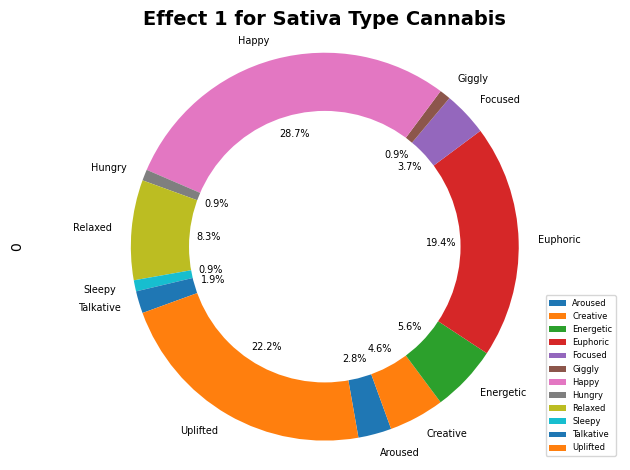

In [56]:
#SATIVA
#Create Donut Charts for each type of cannabies to display how many "Happy" Effects they each have (Use Effect 1)
sativa_e1.plot(kind="pie",autopct="%1.1f%%",subplots=True,startangle=1000,fontsize=7)

plt.title("Effect 1 for Sativa Type Cannabis",fontweight="bold",fontsize=14)
plt.axis("equal")
plt.tight_layout()
#plt.figure(figsize=(5,50))
plt.legend(loc='lower right',fontsize=6)

# draw circle
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# step 4, is to show or save it
plt.show()

In [17]:
#df3.to_csv("MaryJane_clean_data.csv", index=False)